In [1]:
from qutip import *
%matplotlib inline
import matplotlib.pyplot as plt
from math import pi
import numpy as np

In [2]:
# In the RWA, terms in a Hamiltonian which oscillate rapidly are neglected. This is a valid approximation when 
# the applied electromagnetic radiation is near resonance with an atomic transition, and the intensity is low.

# PARAMETERS, where h_bar = 1.0

wc = 1.0  * 2 * pi   # cavity frequency
wa = 1.0  * 2 * pi   # atom frequency
g  = 0.05 * 2 * pi   # coupling strength
kappa = 0.005        # cavity dissipation rate
gamma = 0.05         # atom dissipation rate
N = 2                # number of cavity fock states
n_th_a = 0.0         # avg number of thermal bath excitation
use_rwa = True

tlist = np.linspace(0,25,101)

In [3]:
# intial state
psi0 = tensor(basis(N,0), basis(2,1))    # start with an excited atom

# operators
a  = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2))

# Hamiltonian
if use_rwa:
    H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag())
else:
    H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() + a) * (sm + sm.dag())

In [4]:
c_ops = []

# cavity relaxation
rate = kappa * (1 + n_th_a)
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * a)

# cavity excitation, if temperature > 0
rate = kappa * n_th_a
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * a.dag())

# qubit relaxation
rate = gamma
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * sm)

In [5]:
# evolve system, request that the expectation values of a.dag()*a and sm*sm.dag() are returned by the solver 
# passing the list [a.dag()*a, sm.dag()*sm] as the fifth argument to the solver
output = mesolve(H, psi0, tlist, c_ops, [a.dag() * a, sm.dag() * sm])

Text(0.5, 1.0, 'Vacuum Rabi oscillations')

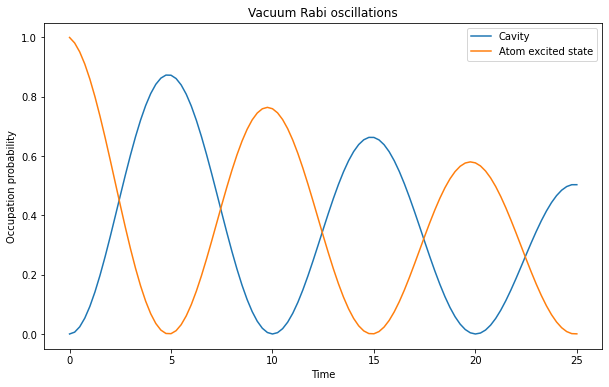

In [6]:
n_c = output.expect[0]
n_a = output.expect[1]

fig, axes = plt.subplots(1, 1, figsize=(10,6))

axes.plot(tlist, n_c, label="Cavity")
axes.plot(tlist, n_a, label="Atom excited state")
axes.legend(loc=0)
axes.set_xlabel('Time')
axes.set_ylabel('Occupation probability')
axes.set_title('Vacuum Rabi oscillations')